# Final project - M<sup>3</sup>

### 1. Introduction

The data that we are using is the [Breast Cancer Coimbra](https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra) dataset from the UCI Machine Learning Repository, donated on 3/5/2018. The dataset was obtained from the Gynaecology Department of the University Hospital Centre of Coimbra between 2009 and 2013. It has patient data on age, BMI, glucose, insulin, HOMA, heptin, adiponectin, resistin, and MCP.1. We selected this dataset as the data was all quantitative, and they separated the healthy and cancer patients.

***Aim***

Make machine learning models that can predict the incidence of breast cancer from patient data.

***Approach***

Three different models will be trained using this data and compared for their ability to predict breast cancer in these patients. The three selected models are XGBoost, Support Vector Machine (SVC), and Random Forest.

### 2. Data pre-processing

In [15]:
%%capture

### Importing modules

%matplotlib inline
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold 



# fetch dataset 
breast_cancer_coimbra = fetch_ucirepo(id=451) 

# XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

#SVM
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

In [9]:
# data (as pandas dataframes) 
X = breast_cancer_coimbra.data.features 

# 1 is healthy, 2 is cancer
y = breast_cancer_coimbra.data.targets

# joining dataframe to put into pairplot
df = X.join(y)
df['Classification'] = df['Classification'].replace({1: 0, 2: 1})
df['Classification'] = df['Classification'].astype('category')

# we had to change Y data to be completely binary (changed 1, 2 to 0,1) and changed it to an array 
y = y.replace({1: 0, 2: 1})
y = y.to_numpy()
y = y.ravel()

# eample data
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


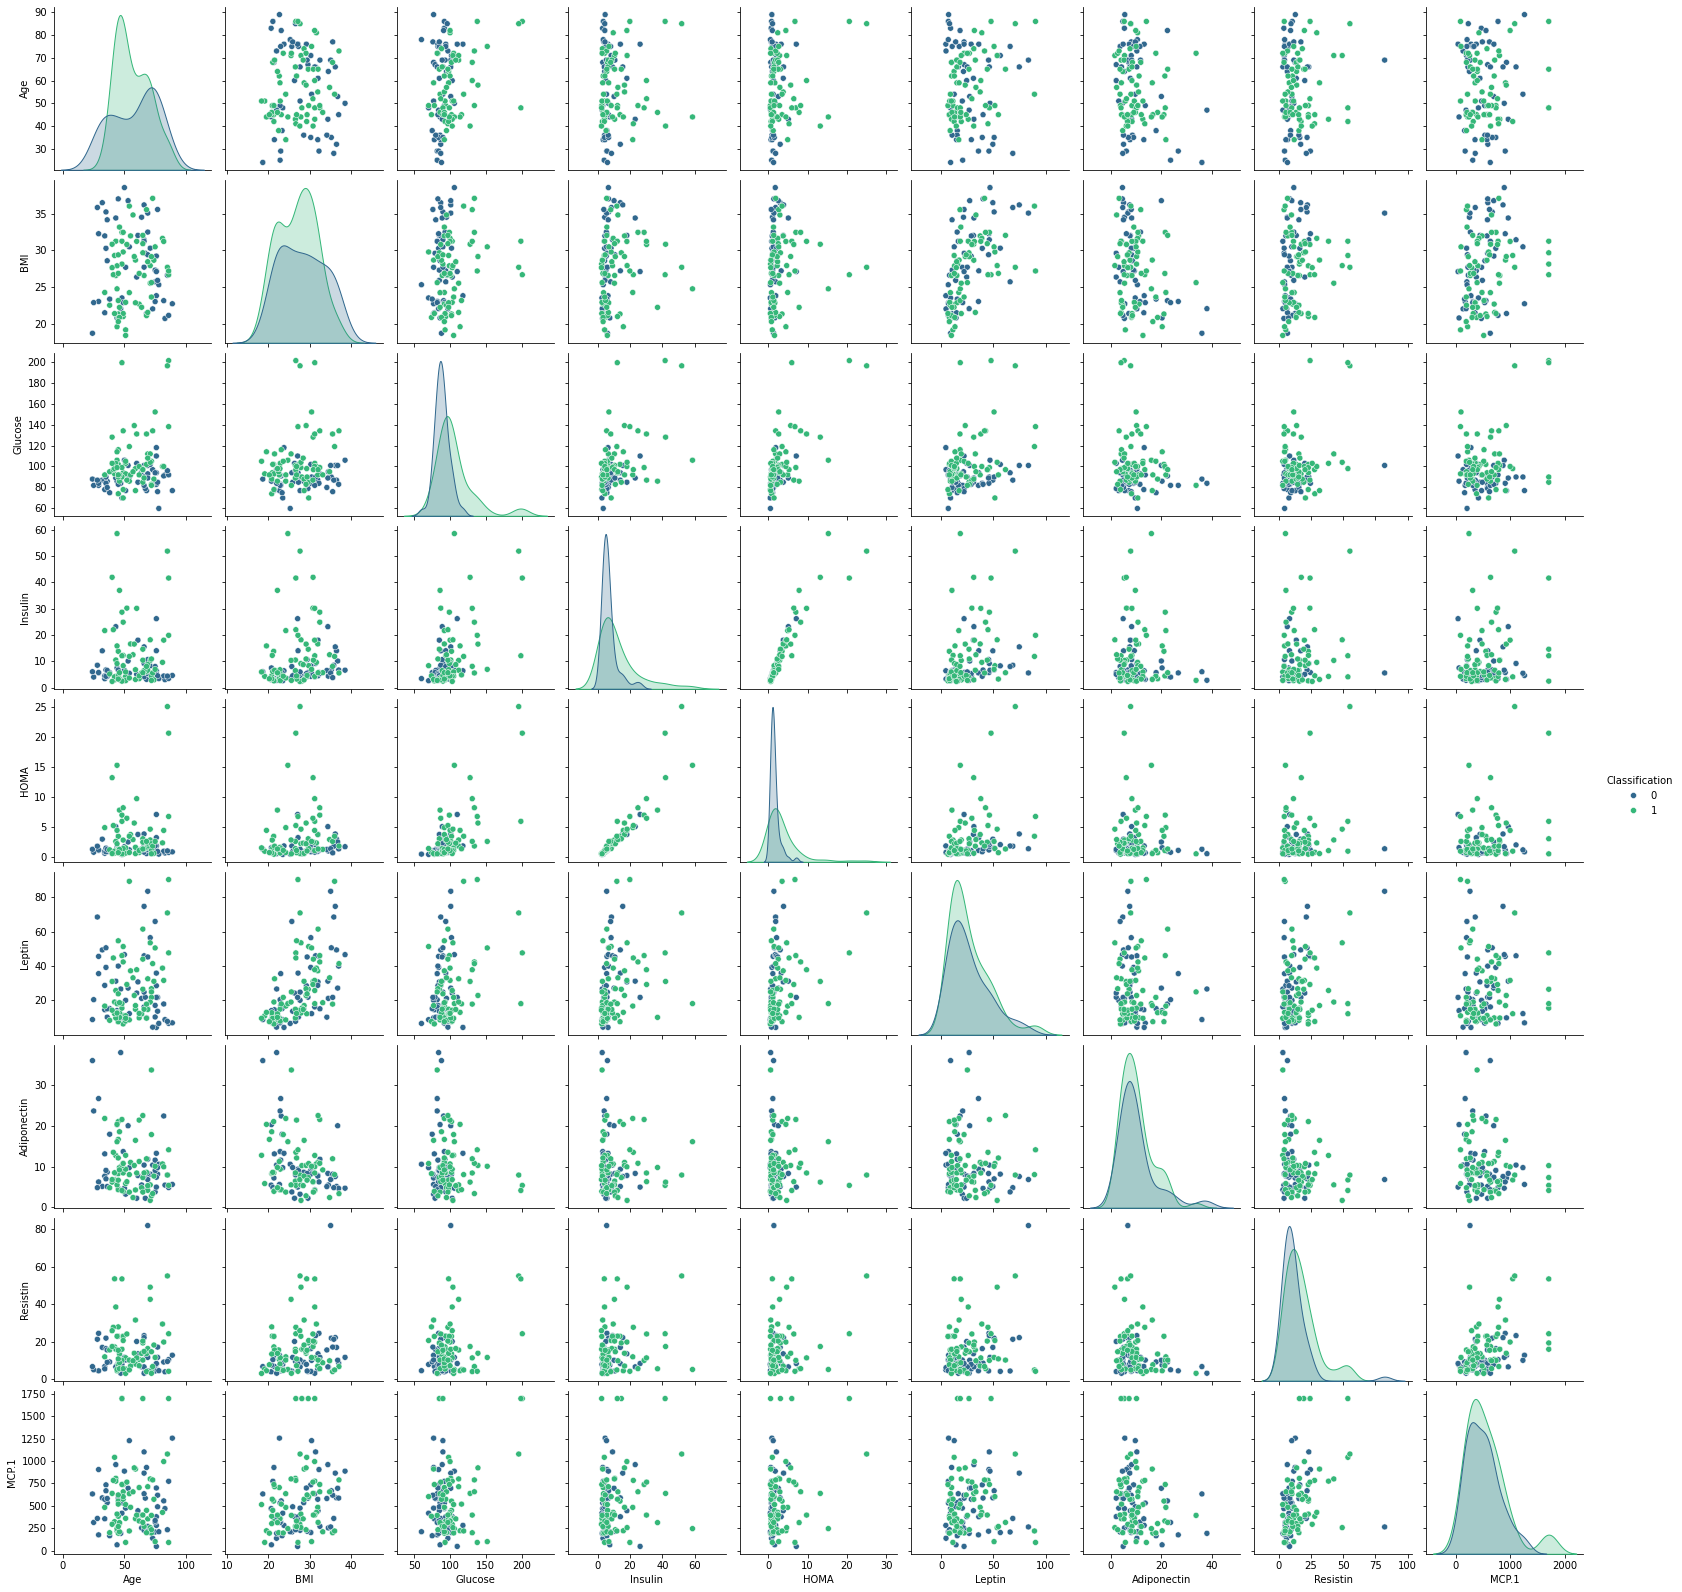

In [6]:
### pairplot

sns.pairplot(df, hue='Classification', palette = 'viridis')
plt.show()

### 3a. Model setup - XGBoost (Emily)

We tried dropping some categories based on a paper that had better results from only using resistin, glucose, age, and BMI. To find an optimal model, we changed n_estimators, max_depth, and learning rate. The model below was the best one.

In [27]:
X = X.drop(columns=['Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'MCP.1'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

xgbModel = xgb.XGBClassifier(n_estimators = 50,
                             max_depth = 3,
                             learning_rate = 0.1)

xgbModel.fit(X_train, y_train)

xgbPredict = xgbModel.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, xgbPredict, squared=False)
print("RMSE:", rmse)

RMSE: 0.408248290463863


In [28]:
print(classification_report(y_test, xgbPredict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.83      0.83      0.83        12

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24



However, for XGBoost, using all variables created a marginally better model.

In [29]:
X = breast_cancer_coimbra.data.features 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

xgbModel = xgb.XGBClassifier(n_estimators = 50,
                             max_depth = 3,
                             learning_rate = 0.1)

xgbModel.fit(X_train, y_train)

xgbPredict = xgbModel.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, xgbPredict, squared=False)
print("RMSE:", rmse)

print(classification_report(y_test, xgbPredict))

RMSE: 0.408248290463863
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.75      1.00      0.86        12

    accuracy                           0.83        24
   macro avg       0.88      0.83      0.83        24
weighted avg       0.88      0.83      0.83        24



### 3b. Model setup - Support Vector Machine (Mack)

In [21]:
# select some models to test 
models = []
models.append(('SVM', SVC(gamma="auto")))
models.append(('KNN', KNeighborsClassifier()))

# process data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(confusion_matrix(y_test, predictions))

[[ 0 12]
 [ 0 12]]
[[6 6]
 [4 8]]


In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.57      0.67      0.62        12

    accuracy                           0.58        24
   macro avg       0.59      0.58      0.58        24
weighted avg       0.59      0.58      0.58        24



In [26]:
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
print(name + ": ")
print(cv_results.mean())
print(cv_results.std())

KNN: 
0.6366666666666668
0.15364300452512042


### 3c. Model setup - Random Forest (Michele)

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=175, max_depth=50, min_samples_split=5)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [34]:
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.76      0.72      0.74        18

    accuracy                           0.69        29
   macro avg       0.67      0.68      0.68        29
weighted avg       0.70      0.69      0.69        29



In [35]:
test_X = X[['Resistin', 'Glucose', 'Age', 'BMI']]

In [36]:
Xtrain, Xtest, ytrain, ytest = train_test_split(test_X, y,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=175, max_depth=50, min_samples_split=10)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [37]:
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.82      0.78      0.80        18

    accuracy                           0.76        29
   macro avg       0.75      0.75      0.75        29
weighted avg       0.76      0.76      0.76        29



In [38]:
### performed k-fold cross validation

k = 20  # Example: 5-fold cross-validation

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=175, max_depth=50, min_samples_split=10)

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-validation scores: [1.         0.83333333 0.66666667 1.         0.83333333 0.66666667
 0.5        0.5        0.66666667 0.66666667 0.66666667 0.33333333
 0.83333333 0.66666667 1.         0.66666667 1.         1.
 1.         1.        ]
Mean CV Score: 0.775
Standard Deviation of CV Scores: 0.1991300524224754


### 4. Results

### 5. Discussion